<a href="https://colab.research.google.com/github/sreesanthrnair/My_Activity/blob/main/Case_study_on_Supervised_learning_Sreesanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
test_data=pd.read_csv('/content/Testing_data.csv')

In [3]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [4]:
train_data=pd.read_csv('/content/Training_data.csv')

In [5]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [7]:
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [8]:
train_data.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [9]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy = 'most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [10]:
train_data[['gender', 'OnlineSecurity']] = mode_imputer.fit_transform(train_data[['gender', 'OnlineSecurity']])
train_data[['MonthlyCharges']] = median_imputer.fit_transform(train_data[['MonthlyCharges']])


In [11]:
train_data['TotalCharges'] = train_data['TotalCharges'].replace(' ', np.nan)
train_data[['TotalCharges']] = (train_data[['TotalCharges']]).astype('float64')
train_data[['TotalCharges']] = median_imputer.fit_transform(train_data[['TotalCharges']])

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [13]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,No,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No


In [14]:
#train_data.duplicated().sum()

In [15]:
#train_data.shape

In [16]:
categorical = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in categorical:
  print(train_data[col].unique())

['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'No phone service' 'Yes']
['No' 'DSL' 'Fiber optic']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['No internet service' 'Yes' 'No']
['No internet service' 'Yes' 'No']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['One year' 'Month-to-month' 'Two year']
['No' 'Yes']
['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [17]:
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# sns.histplot(train_data['MonthlyCharges'], kde=True)
# plt.title('Distribution of Monthly Charges')

# plt.subplot(1, 2, 2)
# sns.histplot(train_data['TotalCharges'], kde=True)
# plt.title('Distribution of Total Charges')

# plt.tight_layout()
# plt.show()

In [18]:
train_data[['OnlineSecurity', 'OnlineBackup',
     'DeviceProtection', 'TechSupport',
     'StreamingTV', 'StreamingMovies']] = train_data[['OnlineSecurity', 'OnlineBackup',
                                               'DeviceProtection', 'TechSupport',
                                               'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

train_data[['MultipleLines']] = train_data[['MultipleLines']].replace('No phone service', 'No')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder=LabelEncoder()

list_to_encoder=['gender',
                 'Partner',
                 'Dependents',
                 'PhoneService',
                 'MultipleLines',
                 'InternetService',
                 'OnlineSecurity',
                 'OnlineBackup',
                 'DeviceProtection',
                 'TechSupport',
                 'StreamingTV',
                 'StreamingMovies',
                 'Contract',
                 'PaperlessBilling',
                 'PaymentMethod',
                 'TotalCharges',
                 'Churn']

In [21]:
for col in list_to_encoder:
  train_data[col]=label_encoder.fit_transform(train_data[col])
 # print(train_data[col].unique())

Test Data

In [22]:
test_data['TotalCharges'] = test_data['TotalCharges'].replace(' ', np.nan)
test_data[['TotalCharges']] = (test_data[['TotalCharges']]).astype('float64')
test_data[['TotalCharges']] = median_imputer.fit_transform(test_data[['TotalCharges']])

test_data[['OnlineSecurity', 'OnlineBackup',
     'DeviceProtection', 'TechSupport',
     'StreamingTV', 'StreamingMovies']] = test_data[['OnlineSecurity', 'OnlineBackup',
                                               'DeviceProtection', 'TechSupport',
                                               'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

test_data[['MultipleLines']] = test_data[['MultipleLines']].replace('No phone service', 'No')


lab_enc = LabelEncoder()

cols_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService','OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract',
               'PaperlessBilling','PaymentMethod', 'Churn']

for col in cols_to_encode:
  test_data[col] = lab_enc.fit_transform(test_data[col])

In [23]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,1,0,1,1,40,1,1,1,0,...,1,0,0,0,0,1,2,81.20,3292.30,0
1,7285-KLOTR,0,0,1,0,12,1,1,0,1,...,1,0,1,1,1,0,2,78.85,876.75,0
2,7486-KSRVI,1,0,0,0,43,1,1,1,0,...,0,1,1,1,1,1,2,100.00,4211.55,1
3,9924-JPRMC,1,0,0,0,72,1,1,1,1,...,1,1,1,1,2,1,2,118.20,8547.15,0
4,4439-YRNVD,0,0,0,0,10,0,0,0,0,...,0,1,0,0,0,0,2,36.25,374.00,0


In [24]:
x = train_data.drop(columns=['customerID'])
x.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.005492,0.014386,0.017469,0.008027,-0.012031,-0.000398,-0.001620,-0.006982,-0.009384,0.004363,0.001094,-0.005660,-0.002890,0.005276,-0.013082,0.002152,-0.005832,-0.007034,-0.010942
SeniorCitizen,0.005492,1.000000,0.020026,-0.211401,0.022672,-0.001077,0.137125,-0.033889,-0.035024,0.075146,0.063309,-0.062202,0.102035,0.113934,-0.139901,0.139978,-0.041336,0.205024,0.109104,0.147568
Partner,0.014386,0.020026,1.000000,0.446565,0.380413,0.014722,0.140791,0.005012,0.138812,0.137398,0.153256,0.123989,0.123755,0.114282,0.297348,-0.023574,-0.161005,0.093530,0.337566,-0.156947
Dependents,0.017469,-0.211401,0.446565,1.000000,0.155722,-0.004817,-0.026858,0.049337,0.090306,0.025300,0.015353,0.056375,-0.021368,-0.043294,0.240714,-0.119744,-0.041358,-0.110288,0.073674,-0.171100
tenure,0.008027,0.022672,0.380413,0.155722,1.000000,0.004304,0.329246,-0.029703,0.321922,0.359734,0.357586,0.327518,0.276019,0.283251,0.675423,0.003805,-0.375795,0.232216,0.847382,-0.358802
PhoneService,-0.012031,-0.001077,0.014722,-0.004817,0.004304,1.000000,0.282142,0.389311,-0.081776,-0.048079,-0.068994,-0.097214,-0.029792,-0.035660,-0.005294,0.020433,0.007867,0.239325,0.075886,0.014327
MultipleLines,-0.000398,0.137125,0.140791,-0.026858,0.329246,0.282142,1.000000,0.009985,0.099376,0.207898,0.206263,0.099829,0.261859,0.262285,0.103699,0.168220,-0.166371,0.479347,0.461083,0.040337
InternetService,-0.001620,-0.033889,0.005012,0.049337,-0.029703,0.389311,0.009985,1.000000,-0.383699,-0.315220,-0.306775,-0.387991,-0.244509,-0.248925,0.097203,-0.138948,0.091968,-0.306803,-0.205546,-0.051762
OnlineSecurity,-0.006982,-0.035024,0.138812,0.090306,0.321922,-0.081776,0.099376,-0.383699,1.000000,0.276234,0.263168,0.349774,0.166408,0.187041,0.240605,-0.003954,-0.155096,0.281649,0.394617,-0.172749
OnlineBackup,-0.009384,0.075146,0.137398,0.025300,0.359734,-0.048079,0.207898,-0.315220,0.276234,1.000000,0.301194,0.286923,0.282154,0.274093,0.163064,0.122362,-0.174124,0.429657,0.483979,-0.079433


In [25]:
y_train = train_data['Churn']
X_train = train_data.drop(columns=['customerID', 'Churn'])

In [26]:
y_test = test_data['Churn']
X_test = test_data.drop(columns=['customerID', 'Churn'])

In [27]:
X_train[['tenure','MonthlyCharges', 'TotalCharges']].skew()

,0
tenure,0.227944
MonthlyCharges,-0.283808
TotalCharges,0.049043


In [28]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

std_scaler = StandardScaler()
pow_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

X_train[['tenure','MonthlyCharges']] = std_scaler.fit_transform(X_train[['tenure','MonthlyCharges']])
X_train[['TotalCharges']] = pow_transformer.fit_transform(X_train[['TotalCharges']])

X_test[['tenure','MonthlyCharges']] = std_scaler.transform(X_test[['tenure','MonthlyCharges']])
X_test[['TotalCharges']] = pow_transformer.transform(X_test[['TotalCharges']])

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# depth_range = np.arange(2, 21)
# split_range = np.arange(2, 21)

# accuracy_matrix = np.zeros((len(depth_range), len(split_range)))

# for i, d in enumerate(depth_range):
#   for j, s in enumerate(split_range):
#     classifier = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=d, min_samples_split=s, random_state=42)
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)
#     accuracy_matrix[i, j] = (accuracy_score(y_test, y_pred))


In [30]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion' : ['entropy', 'gini'],
    'splitter' : ['best', 'random'],
    'max_depth' : np.arange(2, 30),
    'min_samples_split' : np.arange(2, 30),
    'max_features' : ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 6272 candidates, totalling 12544 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'splitter': ['best', 'random']},
             verbose=3)

In [31]:
print(f'best parameters: {grid_search.best_params_}')
print(f'best score: {grid_search.best_score_}')

best parameters: {'criterion': 'entropy', 'max_depth': np.int64(8), 'max_features': 'sqrt', 'min_samples_split': np.int64(25), 'splitter': 'random'}
best score: 0.7894923677671282


In [32]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print(f'accuracy score: {accuracy_score(predictions, y_test)}')

accuracy score: 0.7778566359119943


In [33]:
classifier = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=12, min_samples_split=12, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7735982966643009


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier( n_estimators=100,
                                    criterion='gini',
                                     max_depth=11,
                                     min_samples_split=11,
                                     min_samples_leaf=20,
                                     max_features='log2',
                                     bootstrap=True,
                                     random_state=42
                                     )

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8097941802696949


In [35]:
rf_classifier.feature_importances_

array([0.00730422, 0.01079714, 0.00885023, 0.01120465, 0.19384846,
       0.00370106, 0.01295472, 0.11495101, 0.03286875, 0.00762441,
       0.00426585, 0.02569517, 0.01060269, 0.00969799, 0.24081398,
       0.02146325, 0.04310787, 0.12484554, 0.11540303])

In [36]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors=31,
                                     weights='uniform',
                                     algorithm='auto',
                                     p=1,
                                     metric='minkowski')

In [37]:
kn_classifier.fit(X_train, y_train)
predicted = kn_classifier.predict(X_test)
print(accuracy_score(y_test, predicted))

0.7934705464868701


In [38]:
metric_k = []
neighbors = np.arange(3, 50)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,
                                     weights='uniform',
                                     algorithm='auto',
                                     p=1,
                                     metric='minkowski')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  metric_k.append(acc)

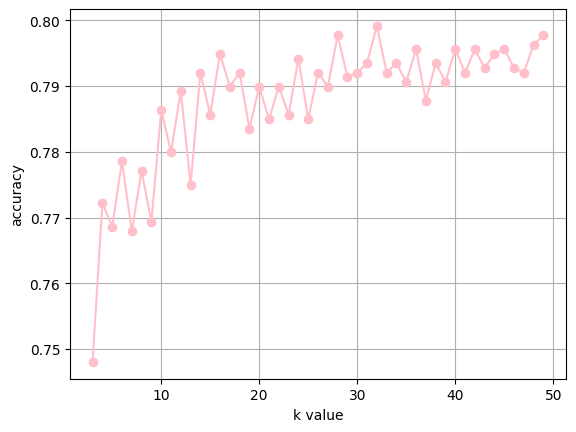

In [44]:
plt.plot(neighbors,  metric_k, 'o-',color='pink')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()